In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("C:/Users/go27s/OneDrive/Documents/Udemy/Statistics and Probability/Statistics/PUBG.csv")
pd.set_option('display.max_columns', None)
df.head()

MemoryError: Unable to allocate 67.9 MiB for an array with shape (2, 4446966) and data type int64

# Average kill per person

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [28]:
df.shape

(4446966, 29)

In [29]:
df['kills'].mean()

0.9247833241810259

In [30]:
df['kills'].quantile(0.8)  # 80% of people have 2 or less kills per game

2.0

In [31]:
df['kills'].quantile(0.99)

7.0

In [32]:
df['kills'].max()

72

# Visualise kill count

C:\Users\go27s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kills', ylabel='count'>

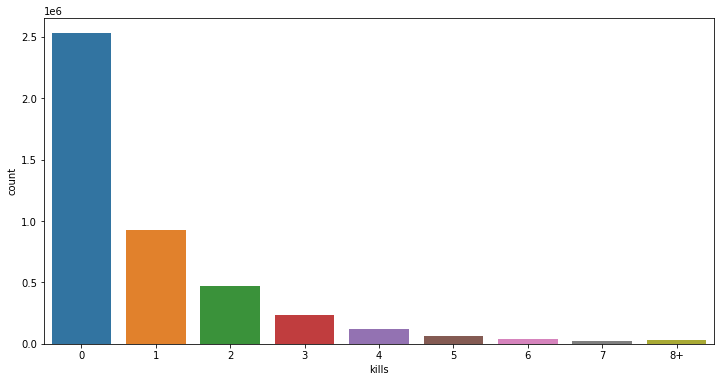

In [33]:
df1 = df.copy()
df.loc[df['kills'] > df['kills'].quantile(0.99)] = '8+' # kills number greater than 99% which is 7

plt.figure(figsize=(12,6))
sns.countplot(df['kills'].astype('str').sort_values())

# Group the players by the number of kills

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Id               object
 1   groupId          object
 2   matchId          object
 3   assists          object
 4   boosts           object
 5   damageDealt      object
 6   DBNOs            object
 7   headshotKills    object
 8   heals            object
 9   killPlace        object
 10  killPoints       object
 11  kills            object
 12  killStreaks      object
 13  longestKill      object
 14  matchDuration    object
 15  matchType        object
 16  maxPlace         object
 17  numGroups        object
 18  rankPoints       object
 19  revives          object
 20  rideDistance     object
 21  roadKills        object
 22  swimDistance     object
 23  teamKills        object
 24  vehicleDestroys  object
 25  walkDistance     object
 26  weaponsAcquired  object
 27  winPoints        object
 28  winPlacePerc

In [16]:
# cut() -- segment and sort data values into bins

df['kill_cat'] = pd.cut(x = df['kills'].astype('int'), bins = [-1,0,2,5,10,60], 
                           labels= ['0 kill', '0 to 2 kills', '2 to 4 kills', '5 to 9 kills', '10+ kills'])

plt.figure(figsize=(14,7))
sns.boxplot(x = 'kill_cat', y = 'winPlacePerc', data=df)
plt.show()

ValueError: invalid literal for int() with base 10: '8+'

In [20]:
# As the number of kills increases the chance of winning gradually increases too. 
# Because the mean changes, the kills have posistive impact on the Winning Percentage

# Walking distance on Winning Percentage

In [24]:
# how many meters has the player walked on avg
df['walkDistance'].mean()

1154.217859096256

In [25]:
df['walkDistance'].quantile(0.99)

4396.0

In [26]:
df['walkDistance'].max() # excluding the outliers

25780.0

C:\Users\go27s\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


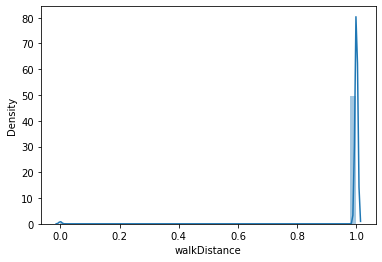

In [29]:
# df['walkDistance'] < df['walkDistance'].quantile(0.99)
sns.distplot(df['walkDistance'] < df['walkDistance'].quantile(0.99))
plt.show()

MemoryError: Unable to allocate 33.9 MiB for an array with shape (4446965,) and data type int64

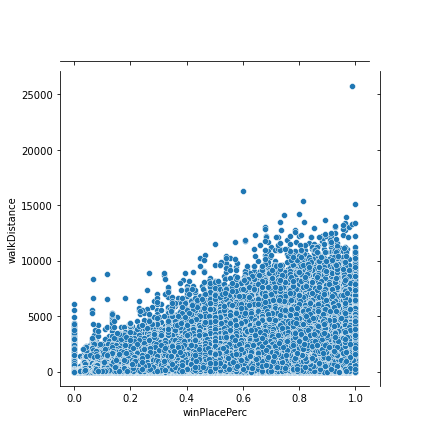

In [31]:
sns.jointplot(x='winPlacePerc', y='walkDistance', data=df)